# AdEase 

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import pandas._libs.testing as _testing
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [117]:
df=pd.read_csv(r"E:/DSML_Projects/TimeSeriesAnalysis/train_1.csv")

In [118]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


* Each row shows the no. of views for each day
* Some webpages has null values for some days that means some pages are devloped after some days

In [119]:
df.shape

(145063, 551)

* Dataset has 145063 rows and 551 columns
* For some rows there are null values after some days that means new wesbites were developed

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [121]:
#Dropping that row which has all null values which means that website is not at all visited
df= df.dropna(how='all')
print(df.shape)

(145063, 551)


In [122]:
#Dropping that rows which has more than 300 NAN values why bcz that website is newly created 
#Dropping off newly created webpages
df=df.dropna(thresh=300)
print(df.shape)

(133617, 551)


In [123]:
#Replacing NAN values with 0
df=df.fillna(method="bfill")

In [124]:
df['Page']

0                   2NE1_zh.wikipedia.org_all-access_spider
1                    2PM_zh.wikipedia.org_all-access_spider
2                     3C_zh.wikipedia.org_all-access_spider
3                4minute_zh.wikipedia.org_all-access_spider
5                   5566_zh.wikipedia.org_all-access_spider
                                ...                        
145012    Legión_(Marvel_Comics)_es.wikipedia.org_all-ac...
145013    Referéndum_sobre_la_permanencia_del_Reino_Unid...
145014    Salida_del_Reino_Unido_de_la_Unión_Europea_es....
145015    Amar,_después_de_amar_es.wikipedia.org_all-acc...
145016    Anexo:89.º_Premios_Óscar_es.wikipedia.org_all-...
Name: Page, Length: 133617, dtype: object

In [125]:
import re
def split_page(page):
    w=re.split('_|\.',page)
    return w[1], w[-2], w[-1] 

    

* By using function we can split Page as we need language, access_type and access_origin

In [126]:
split_page(df.Page[1])

('zh', 'all-access', 'spider')

In [127]:
df['languages'] = df['Page'].apply(lambda row:row.split('wikipedia')[0][-3:-1])
df['access_types'] = df['Page'].apply(lambda row:split_page(row)[1])
df['access_origin'] = df['Page'].apply(lambda row:split_page(row)[2])
df.head(3)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,languages,access_types,access_origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh,all-access,spider


# EDA

In [128]:
df.languages.unique()

array(['zh', 'fr', 'en', 'de', '02', 'ru', 'nt', ':P', 'ja', 'es'],
      dtype=object)

In [129]:
def lang_misc(row):
    if (row == 'nt') | (row == ':P') | (row == '02'):
        return 'misc'
    else:
        return row

* Apart from known languages I am replacing all the items with Misclleneous

In [130]:
df['languages'] = df.languages.apply(lang_misc)
df['languages'].unique()

array(['zh', 'fr', 'en', 'de', 'misc', 'ru', 'ja', 'es'], dtype=object)

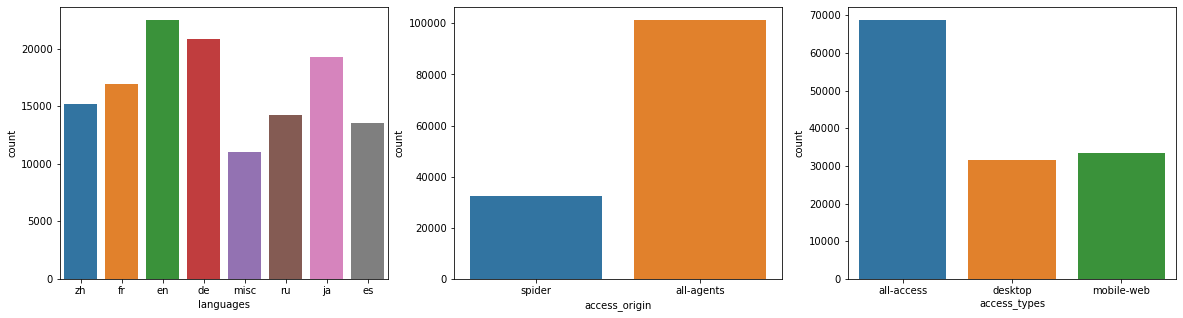

In [131]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(df.languages)
plt.subplot(1,3,2)
sns.countplot(df.access_origin)
plt.subplot(1,3,3)
sns.countplot(df.access_types)
plt.show()

* By seeing the graph among all languges English website has more no. of views
* Access origin whith all_agents are visited more
* Websites with access_type all_acccess are vistied more
* Desktop and mobiles websites are vistied equally

In [132]:
# Dropping off as I mostly gather infr from them
df.drop(['Page', 'access_origin', 'access_types' ], axis=1, inplace=True)

In [133]:
df.columns

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27',
       '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31', 'languages'],
      dtype='object', length=551)

In [134]:
df_language=df.groupby('languages').mean().transpose()
df_language

languages,de,en,es,fr,ja,misc,ru,zh
2015-07-01,659.643347,4001.319755,1311.882793,515.417453,625.707489,147.267134,672.368115,296.341924
2015-07-02,650.637836,3982.456373,1260.528653,518.440583,716.823944,150.603713,684.115207,296.908290
2015-07-03,625.843979,3768.030508,1163.546843,500.278086,645.835812,141.368253,636.698598,289.952206
2015-07-04,574.640663,3916.882416,1093.173275,532.300448,810.330500,121.812506,597.467835,288.543817
2015-07-05,669.207437,4047.464378,1176.752983,523.050920,778.062296,137.181396,635.421303,308.254421
...,...,...,...,...,...,...,...,...
2016-12-27,936.509560,6316.741661,1075.433769,841.000236,809.055351,197.716665,999.538402,363.499047
2016-12-28,888.229431,6111.874055,1113.960151,784.487786,807.502306,229.046054,946.457954,369.676747
2016-12-29,865.121376,6520.345104,1062.565346,764.101015,884.068463,191.817694,910.597197,340.895470
2016-12-30,822.396952,5404.746865,809.185743,711.528263,979.460016,197.556840,816.943027,343.139702


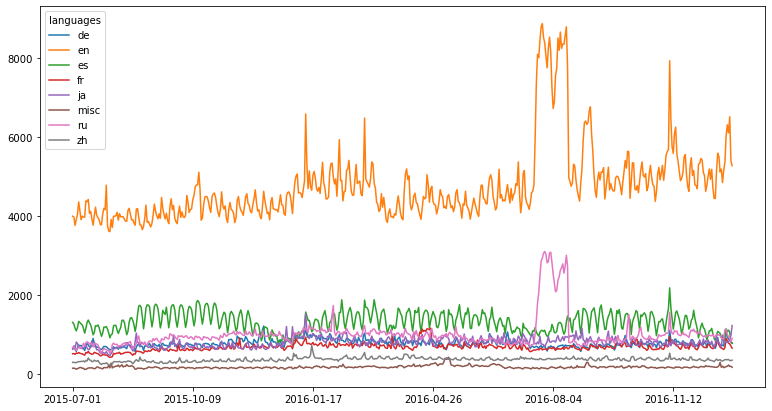

In [135]:
df_language.plot(figsize=(13,7))

In [136]:
df_language.reset_index(inplace=True)


In [137]:
df_language

languages,index,de,en,es,fr,ja,misc,ru,zh
0,2015-07-01,659.643347,4001.319755,1311.882793,515.417453,625.707489,147.267134,672.368115,296.341924
1,2015-07-02,650.637836,3982.456373,1260.528653,518.440583,716.823944,150.603713,684.115207,296.908290
2,2015-07-03,625.843979,3768.030508,1163.546843,500.278086,645.835812,141.368253,636.698598,289.952206
3,2015-07-04,574.640663,3916.882416,1093.173275,532.300448,810.330500,121.812506,597.467835,288.543817
4,2015-07-05,669.207437,4047.464378,1176.752983,523.050920,778.062296,137.181396,635.421303,308.254421
...,...,...,...,...,...,...,...,...,...
545,2016-12-27,936.509560,6316.741661,1075.433769,841.000236,809.055351,197.716665,999.538402,363.499047
546,2016-12-28,888.229431,6111.874055,1113.960151,784.487786,807.502306,229.046054,946.457954,369.676747
547,2016-12-29,865.121376,6520.345104,1062.565346,764.101015,884.068463,191.817694,910.597197,340.895470
548,2016-12-30,822.396952,5404.746865,809.185743,711.528263,979.460016,197.556840,816.943027,343.139702


# Checking for Stationarity

In [138]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df_language["de"])
print(result[1])

0.10704756702772433


* Here P-value is very high so I can concluse that data is not stationary
* I need to make this data stationary

# Making data stationary by removing Trend and Seasonality

In [139]:
ts=df_language["en"]

In [140]:
ts.values

array([4001.31975451, 3982.45637285, 3768.03050787, 3916.88241573,
       4047.46437784, 4364.84901717, 4147.22413946, 3912.35217469,
       4004.55634617, 3977.10917904, 3979.57996086, 4390.29404963,
       4370.26892289, 4424.3330072 , 4073.06234991, 4123.69607756,
       3930.26127368, 3774.118029  , 4017.6901183 , 4229.98283376,
       4023.63635151, 3963.90660856, 3910.16032198, 3790.39624655,
       3782.6352397 , 4053.34096771, 4200.56675265, 4169.17157342,
       4788.10944588, 3769.46335498, 3623.16601441, 3610.99902161,
       3920.29978653, 3713.71586765, 4000.15880993, 4001.90634172,
       4010.38081473, 4099.66908298, 3898.99452993, 4066.06519612,
       3987.55060927, 3987.27252513, 3989.83331851, 3927.66463577,
       3875.04936405, 3873.4409855 , 4144.46335498, 4200.23218892,
       4064.17908921, 3908.76211865, 3914.68593792, 3829.85382015,
       3772.84732723, 4181.11798452, 4193.70697323, 3971.40989949,
       3778.49332918, 3775.81637463, 3659.22591835, 3747.16774

In [141]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(ts.values, model="additive",freq=7)

In [142]:
trend=decomposition.trend
seasonal=decomposition.seasonal
residuals=decomposition.resid

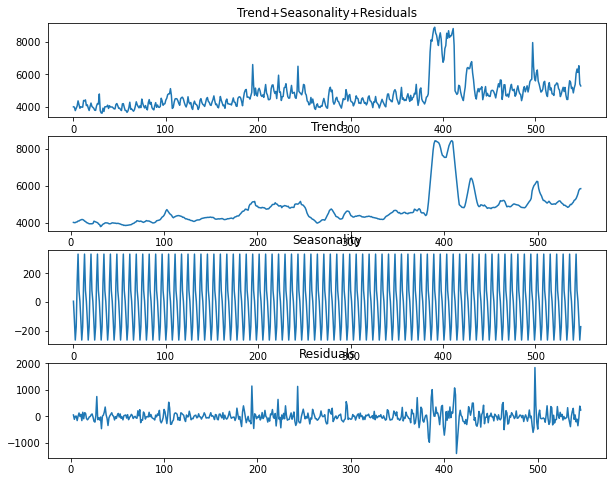

In [143]:
plt.figure(figsize=(10,8))
plt.subplot(411)
plt.title("Trend+Seasonality+Residuals")
plt.plot(ts.values,label="observed")
plt.subplot(412)
plt.title("Trend")
plt.plot(trend,label="Trend")
plt.subplot(413)
plt.title("Seasonality")
plt.plot(seasonal,label="Seasonal")
plt.subplot(414)
plt.title("Residuals")
plt.plot(residuals,label="Residuals")

# ACF and PACF 

In [144]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

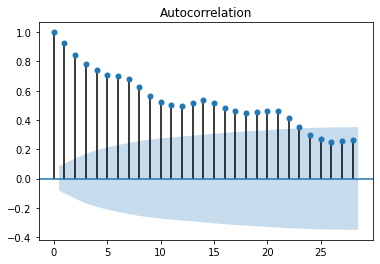

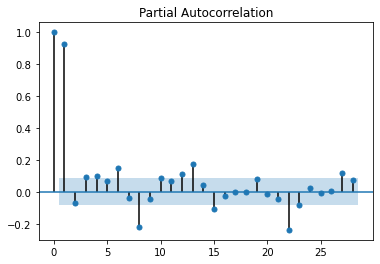

In [145]:
#Checking without detrending and deseasonalising
acf1=plot_acf(ts)
pacf1=plot_pacf(ts)


* Here I can see both trend and seasonality so first I will remove trend and I will plot ACF and PACF 

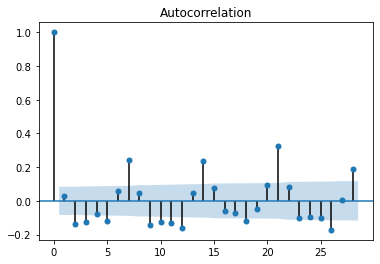

In [146]:
#Detrending
detrend=ts.diff()
acf2=plot_acf(detrend[1:])


* Now trend is removed by differentiating
* Need to deseasonalise

In [147]:
#Deseasonalising
deseason = detrend[1:].diff(7)
deseason.head(10)

1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8     111.067553
9     186.978698
10   -146.381126
Name: en, dtype: float64

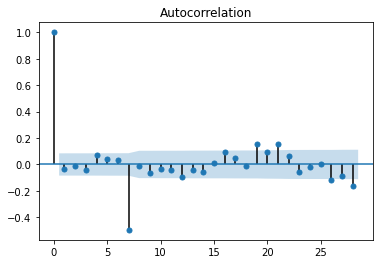

In [148]:
acf3=plot_acf(deseason[7:])


* Now trend and seasonality both are removed

In [149]:
r1=adfuller(detrend[1:])
print(r1[1])
r2=adfuller(deseason[7:])
print(r2[1])

5.235961488891641e-13
7.834838286677906e-23


* After removing trend and seasonality we got P value less than 0.05 that means now data is stationary

# MODELLING

In [150]:
#Splitting dat into train and test
train_ts=ts[:-20]
test_ts=ts[-20:]

In [151]:
train_ts

0      4001.319755
1      3982.456373
2      3768.030508
3      3916.882416
4      4047.464378
          ...     
525    5120.320911
526    5025.421195
527    4628.591123
528    4790.386730
529    5016.092057
Name: en, Length: 530, dtype: float64

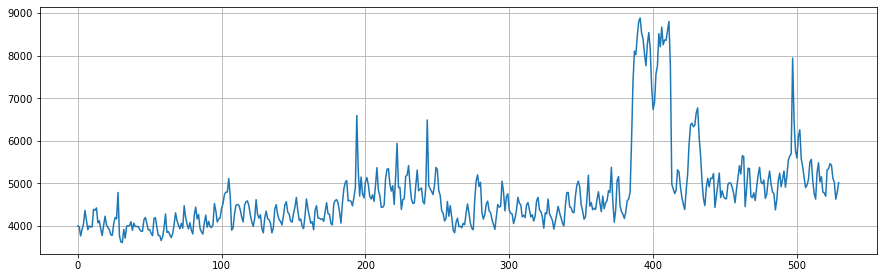

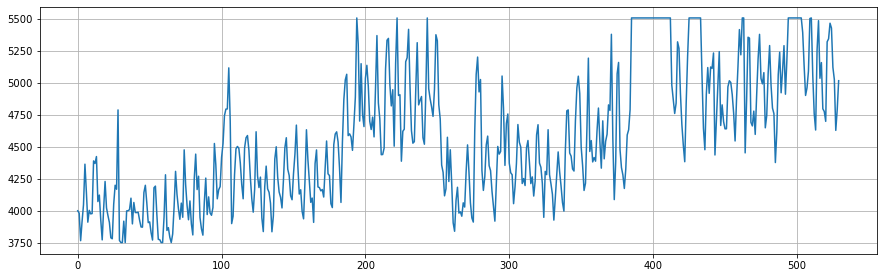

In [152]:
# Plots before and after clipping.
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
train_ts.plot(kind='line')
plt.grid()
plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
train_ts.clip(upper=train_ts.quantile(0.90),lower=train_ts.quantile(0.01)).plot(kind='line')
plt.grid()
plt.show()

* Clipping the data in order to remove outliers

In [154]:
train_ts = train_ts.clip(upper=train_ts.quantile(0.90),lower=train_ts.quantile(0.01))

In [156]:
#Choosing best P,D,Q values
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import ParameterGrid
param_grid = list(ParameterGrid({'p':np.arange(1,6), 'q':np.arange(1,6)}))
arima_mapes = []
for i in range(len(param_grid)):
    ts_arima = SARIMAX(train_ts,order=(param_grid[i]['p'], 1, 
                                                          param_grid[i]['q'])).fit(disp=False)
    arima_mapes.append(mean_absolute_percentage_error(test_ts,ts_arima.forecast(len(test_ts)))*100)
            

In [158]:
param_grid[np.argmin(np.array(arima_mapes))], min(arima_mapes)

({'p': 3, 'q': 4}, 7.517368099473081)

* We are getting minimum MAPE for P=1 and Q=1 so I will use these values for SARIMAX model

In [160]:
ts_arima = SARIMAX(train_ts, order=(3,1,4)).fit(disp=False)

In [161]:
ts_arima.forecast(len(test_ts)).values

array([5221.82840982, 5242.48639063, 5087.98227696, 4891.05738581,
       4803.67040339, 4891.16467636, 5086.1580157 , 5241.0707313 ,
       5239.96559095, 5085.33599699, 4894.97951825, 4812.27891962,
       4898.21618085, 5086.43768314, 5234.45642759, 5231.50340699,
       5081.4036082 , 4898.48309059, 4820.50737123, 4904.93774563])

In [109]:
test_ts

530    5197.552744
531    4938.603887
532    5188.435515
533    4714.710798
534    4452.269101
535    4452.045139
536    5143.064796
537    5599.161078
538    5512.880859
539    5122.515699
540    5194.291959
541    4853.778929
542    5163.148137
543    5362.894690
544    6039.891755
545    6316.741661
546    6111.874055
547    6520.345104
548    5404.746865
549    5282.850129
Name: en, dtype: float64

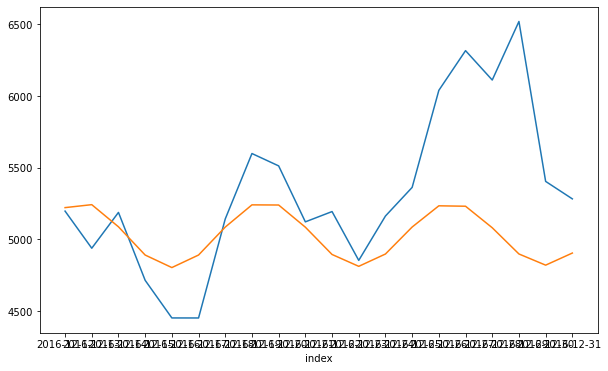

In [162]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df_language['index'][-20:], y=test_ts.values)
sns.lineplot(x=df_language['index'][-20:], y=ts_arima.forecast(len(test_ts)).values)
plt.show()

# SARIMAX

In [43]:
# I will train SARIMAX using p=6 & p=7 which are obtained from ARIMA
# For AR-Seasonality an MA-seasonality, finding the best combination using grid␣search.
# I will use M=7 as I have seen week as seasonality
exog = pd.read_excel('E:DSML_Projects/TimeSeriesAnalysis/Exog.xlsx').rename({'Exog':'Campaign'}, axis=1)
exog.head()

,Campaign
0,0
1,0
2,0
3,0
4,0


In [165]:
param_grid1 = list(ParameterGrid({'P':np.arange(1,5), 'Q':np.arange(1,6)}))
sarimax_mapes = []
for i in range(len(param_grid1)):
    ts_sarimax = SARIMAX(train_ts,
                         exog = exog.Campaign[:len(train_ts)],
                         order=(3, 1, 
                                4),
                         seasonal_order=(param_grid1[i]['P'], 1,
                                         param_grid1[i]['Q'], 7),
                        enforce_stationarity=False).fit(disp=False)
    test_forecast = ts_sarimax.forecast(steps = len(test_ts),exog = exog.Campaign[len(train_ts):]
                                        .reset_index(drop=True))
    sarimax_mapes.append(mean_absolute_percentage_error(test_ts, test_forecast)*100)

In [166]:
param_grid1[np.argmin(np.array(arima_mapes))], min(arima_mapes)


({'P': 3, 'Q': 4}, 7.517368099473081)

* I will do meddling with P=4,Q=5 as it got less MAPE

In [167]:
# Modellin with best P and Q
s_sarimax = SARIMAX(train_ts,
                         exog = exog.Campaign[:len(train_ts)],
                         order=(3, 1, 4),
                         seasonal_order=(3, 1,
                                         4, 7),
                        enforce_stationarity=False).fit(disp=False)
test_forecast = ts_sarimax.forecast(steps = len(test_ts),exog = exog.Campaign[len(train_ts):]
                                        .reset_index(drop=True))

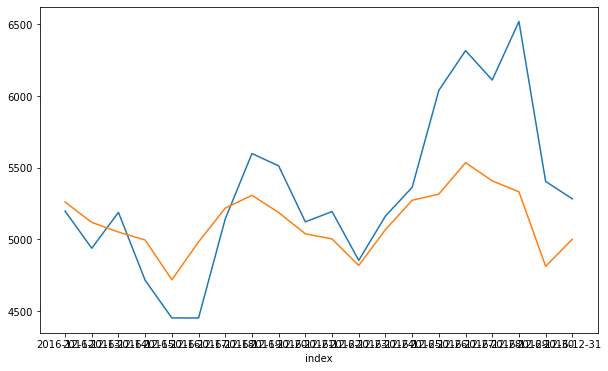

In [168]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df_language['index'][-20:], y=test_ts.values)
sns.lineplot(x=df_language['index'][-20:], y=test_forecast.values)
plt.show()